In [1]:
import pandas as pd
import numpy as np
import os

import cv2
import matplotlib.pyplot as plt

In [2]:
path=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train'

In [7]:
im1=cv2.imread(r'E:\AI\dataset_for_image_classification\oxford_IIIT_pet_dataset_dogs_cats\images\Abyssinian_3.jpg')
im1

array([[[32, 27, 28],
        [33, 28, 29],
        [33, 28, 29],
        ...,
        [25, 21, 20],
        [25, 21, 20],
        [24, 20, 19]],

       [[33, 28, 29],
        [33, 28, 29],
        [33, 28, 29],
        ...,
        [24, 20, 19],
        [24, 20, 19],
        [24, 20, 19]],

       [[33, 28, 29],
        [33, 28, 29],
        [34, 29, 30],
        ...,
        [24, 20, 19],
        [24, 20, 19],
        [24, 20, 19]],

       ...,

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[16, 16, 16],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7]]], dtype=uint8)

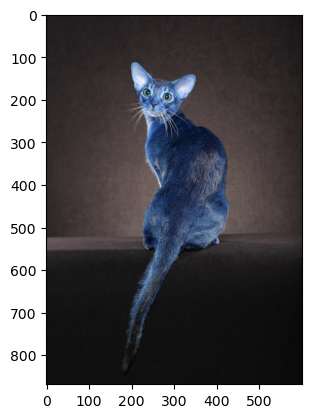

In [9]:
plt.imshow(im1);

# so, the image dimension is (869,600,3)

In [10]:
im1.shape

(869, 600, 3)

In [39]:
x=[]
y=[]

for i in os.listdir(path):
    print(i)
    for j in os.listdir(os.path.join(path,i)):
        image_matrix=cv2.imread(os.path.join(path,i,j))
        image_matrix=cv2.resize(image_matrix,(250,250))
        y.append(i)
        x.append(image_matrix)

NORMAL
PNEUMONIA


In [40]:
x=np.array(x)
y=np.array(y)

In [41]:
x.shape

(3714, 250, 250, 3)

In [42]:
y.shape

(3714,)

# RESIZING , NORMALIZATION ,AUGMENTATION is imp. part of PRE PROCESSING

In [35]:
x

array([[[[ 23,  23,  23],
         [ 22,  22,  22],
         [ 19,  19,  19],
         ...,
         [ 95,  95,  95],
         [ 95,  95,  95],
         [ 98,  98,  98]],

        [[ 23,  23,  23],
         [ 23,  23,  23],
         [ 20,  20,  20],
         ...,
         [ 96,  96,  96],
         [ 93,  93,  93],
         [ 96,  96,  96]],

        [[ 21,  21,  21],
         [ 21,  21,  21],
         [ 22,  22,  22],
         ...,
         [ 94,  94,  94],
         [ 94,  94,  94],
         [ 95,  95,  95]],

        ...,

        [[ 34,  34,  34],
         [ 35,  35,  35],
         [ 35,  35,  35],
         ...,
         [ 84,  84,  84],
         [ 86,  86,  86],
         [ 85,  85,  85]],

        [[ 42,  42,  42],
         [ 41,  41,  41],
         [ 39,  39,  39],
         ...,
         [100, 100, 100],
         [ 98,  98,  98],
         [101, 101, 101]],

        [[ 49,  49,  49],
         [ 51,  51,  51],
         [ 49,  49,  49],
         ...,
         [121, 121, 121],
        

In [36]:
x=x.astype('float64')
x

MemoryError: Unable to allocate 13.3 GiB for an array with shape (3714, 400, 400, 3) and data type float64

In [28]:
x=x/255
x

MemoryError: Unable to allocate 13.3 GiB for an array with shape (3714, 400, 400, 3) and data type float64

In [29]:
y=pd.get_dummies(y,dtype='uint8')
y

,NORMAL,PNEUMONIA
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
3709,False,True
3710,False,True
3711,False,True
3712,False,True


# now, first split the data into train and test

In [ ]:
train_x, train_y, test_x, test_y =train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
train_x.shape , train_y.shape

In [ ]:
test_x.shape, test_y.shape

# now, lets do data augmentation

In [26]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [27]:
datagen=ImageDataGenerator(rotation_range=0.75,
                           zoom_range=0.75,
                           horizontal_flip=True,
                           fill_mode='nearest'
                          )
datagen

# now, lets do TRANSFER LEARNING AND DOWNLOAD VGG16 MODEL ARCHITECTURE AND WEIGHTS also

In [ ]:
vgg_conv=VGG16(weights='imagenet', include_top=False, input_shape=(400,400,3))
vgg_conv

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Convolution2D, MaxPooling2D

In [ ]:
for i in vgg_conv[:-5]:
    i.trainable=False

In [ ]:
model_xray=Sequentail()

In [ ]:
model_xray.add(datagen)
model_xray.add(vgg_conv)

model_xray.add(Flatten())

model_xray.add(Dense(512, activation='relu'))
model_xray.add(Dropout(0.3))

model_xray.add(Dense(256,activation='relu'))
model_xray.add(Dropout(0.3))

model_xray.add(Dense(128,activation='relu'))
model_xray.add(Dropout(0.3))

model_xray.add(Dense(128,activation='relu'))
model_xray.add(Dropout(0.3))


model_xray.add(Dense(10,activation='softmax'))

In [ ]:
model_xray.summary()

In [ ]:
model_xray.compile(loss='categorical_crossentropy',
                 metrics=['accuracy'],
                 optimizer='adam')

In [ ]:
model_xray.summary()

In [ ]:
import time

In [ ]:
start_time=time.time()

history_xray=model_xray.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=3, batch_size=200, verbose=1)

end_time=time.time()

In [ ]:
time_taken=end_time-start_time
time_taken